In [1]:
import pandas as pd
import numpy as np
import os
import json

In [4]:
def get_df_data(daily_resp_json):
    avg_heart_rate = []
    act_seconds = []
    act_calories = []
    avg_stress = []
    for day in daily_resp_json["data"]:
        ahr = day["heart_rate_data"]["summary"]["avg_hr_bpm"]
        act_secs = day["active_durations_data"]["activity_seconds"]
        act_cals = day["calories_data"]["net_activity_calories"]
        avg_strs = day["stress_data"]["avg_stress_level"]
        avg_heart_rate.append(ahr)
        act_seconds.append(act_secs)
        act_calories.append(act_cals)
        avg_stress.append(avg_strs)
    df = pd.DataFrame({
        "avg_heart_rate": avg_heart_rate,
        "act_seconds": act_seconds,
        "act_calories": act_calories,
        "avg_stress": avg_stress,
    })
    return df

def extract_relevant_features(filename = "output.json"):
    # Specify the file name and path
    file_path = "/Users/jasonzhang/Documents/PersonalProjects/HackMIT2023/jason/" + filename

    # Read the JSON file and parse it into a dictionary
    with open(file_path, "r") as file:
        data = json.load(file)
        main_df = pd.read_csv("/Users/jasonzhang/Documents/PersonalProjects/HackMIT2023/jason/tracker_data.csv")

        # Add each partition's data to the main dataframe
        for partition in data:
            df = get_df_data(partition)
            main_df = pd.concat([main_df, df], axis=0)
        
        clean_df = main_df.dropna().reset_index(drop=True)
        clean_df.to_csv("tracker_data.csv", index=False)

In [11]:
extract_relevant_features("output4.json")

/var/folders/q0/tp61rdx579s1pr09fjqsx_gw0000gn/T/ipykernel_7949/2519871316.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  main_df = pd.concat([main_df, df], axis=0)


In [13]:
df = pd.read_csv("tracker_data.csv")
df

,avg_heart_rate,act_seconds,act_calories,avg_stress
0,77.917355,7770,122,56
1,67.004980,3280,60,28
2,71.544506,12325,394,34
3,71.190337,7705,339,33
4,72.600000,60,0,46
...,...,...,...,...
61,84.267792,24663,1134,37
62,91.182045,14203,780,66
63,78.578984,21439,928,38
64,63.250000,360,0,19


<Axes: >

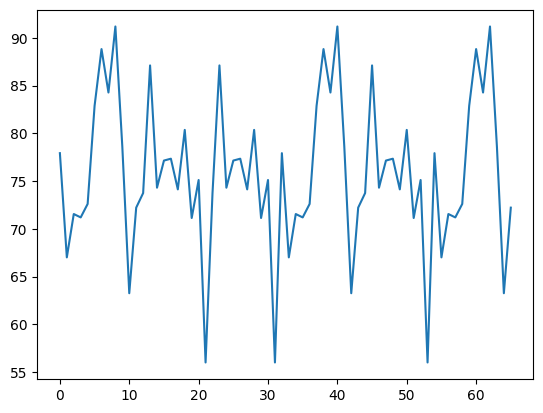

In [14]:
df.avg_heart_rate.plot.line()